### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [ ]:
# Install hms library to convert times
install.packages("hms")
library("hms")

# Install ggplot2
install.packages('ggplot2')
library(ggplot2)

install.packages('gridExtra')
require(gridExtra)

# Make charts wider
options(repr.plot.width=20, repr.plot.height=8)

In [267]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [326]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NY
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NY
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NY
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NY
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NY
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NY


In [33]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [34]:
head(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
6,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


## Data Wrangling
After observation of the three datasets, some wrangling is in order.
- Visual inspection of files. Deleted last row in each that had incomplete data.
- Add a City column to each df
- Convert Trip.Duration for Washington to int
- Add Gender and Birth.Year to wash to make df's consistent
- Append the 3 df's into a single df
- Parse Start.Time into Month, Day, Day of Week
- Parse Start.Time into new timediff columns Rental.Start
- Create Age column and calculate based on 2017 - Birth.Year where available

In [268]:
# Add City column to the 3 dataframes
# https://www.geeksforgeeks.org/how-to-add-an-empty-column-to-dataframe-in-r/

ny[,'City'] = 'NY'
wash[,'City'] = 'DC'
chi[,'City'] = 'CH'

# Convert Trip.Duration for Wash to int and hide the resulting output
invisible(transform(wash, Trip.Duration = as.integer(Trip.Duration)))


# Add Gender and Birth.Year to wash
wash[,c('Gender', 'Birth.Year')] = 'NA'

# Append the 3 df's into a single master
dfMaster = rbind(ny, wash)
dfMaster = rbind(dfMaster, chi)

# Parse Start.Time into Month, Day, Day of Week columns
dfMaster[,'Year'] = as.integer(format(as.Date(dfMaster$Start.Time, '%Y-%m-%d'), '%Y'))
dfMaster[,'Month'] = as.integer(format(as.Date(dfMaster$Start.Time, '%Y-%m-%d'), '%m'))
dfMaster[,'Day'] = as.integer(format(as.Date(dfMaster$Start.Time, '%Y-%m-%d'), '%d'))
dfMaster[,'Day.Of.Week'] = as.integer(format(as.Date(dfMaster$Start.Time, '%Y-%m-%d'), '%u'))   # Monday is 1

# Calcuate Age where possible
dfMaster[,'Age'] = as.integer(as.integer(2017) - as.integer(dfMaster$Birth.Year))

# Create Mins column for Trip.Duration in seconds / 60 to give minutes
dfMaster[,'Mins'] = dfMaster$Trip.Duration / 60

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [296]:
head(dfMaster)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Year,Month,Day,Day.Of.Week,Age,Mins
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NY,2017,6,11,7,19,13.250000
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NY,2017,5,11,4,36,11.533333
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NY,2017,3,29,3,30,22.083333
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NY,2017,5,8,1,31,11.716667
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NY,2017,6,21,3,25,5.483333
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NY,2017,2,22,3,31,16.633333


### Question 1


**My initial questions on the data after doing some wrangling were based on the volume of bikeshares in each city. Which city has the most bikeshare rentals by month and are there similar trends between the cities? I also want to know which days of the week have the most bikeshare rentals brokend down by city.**

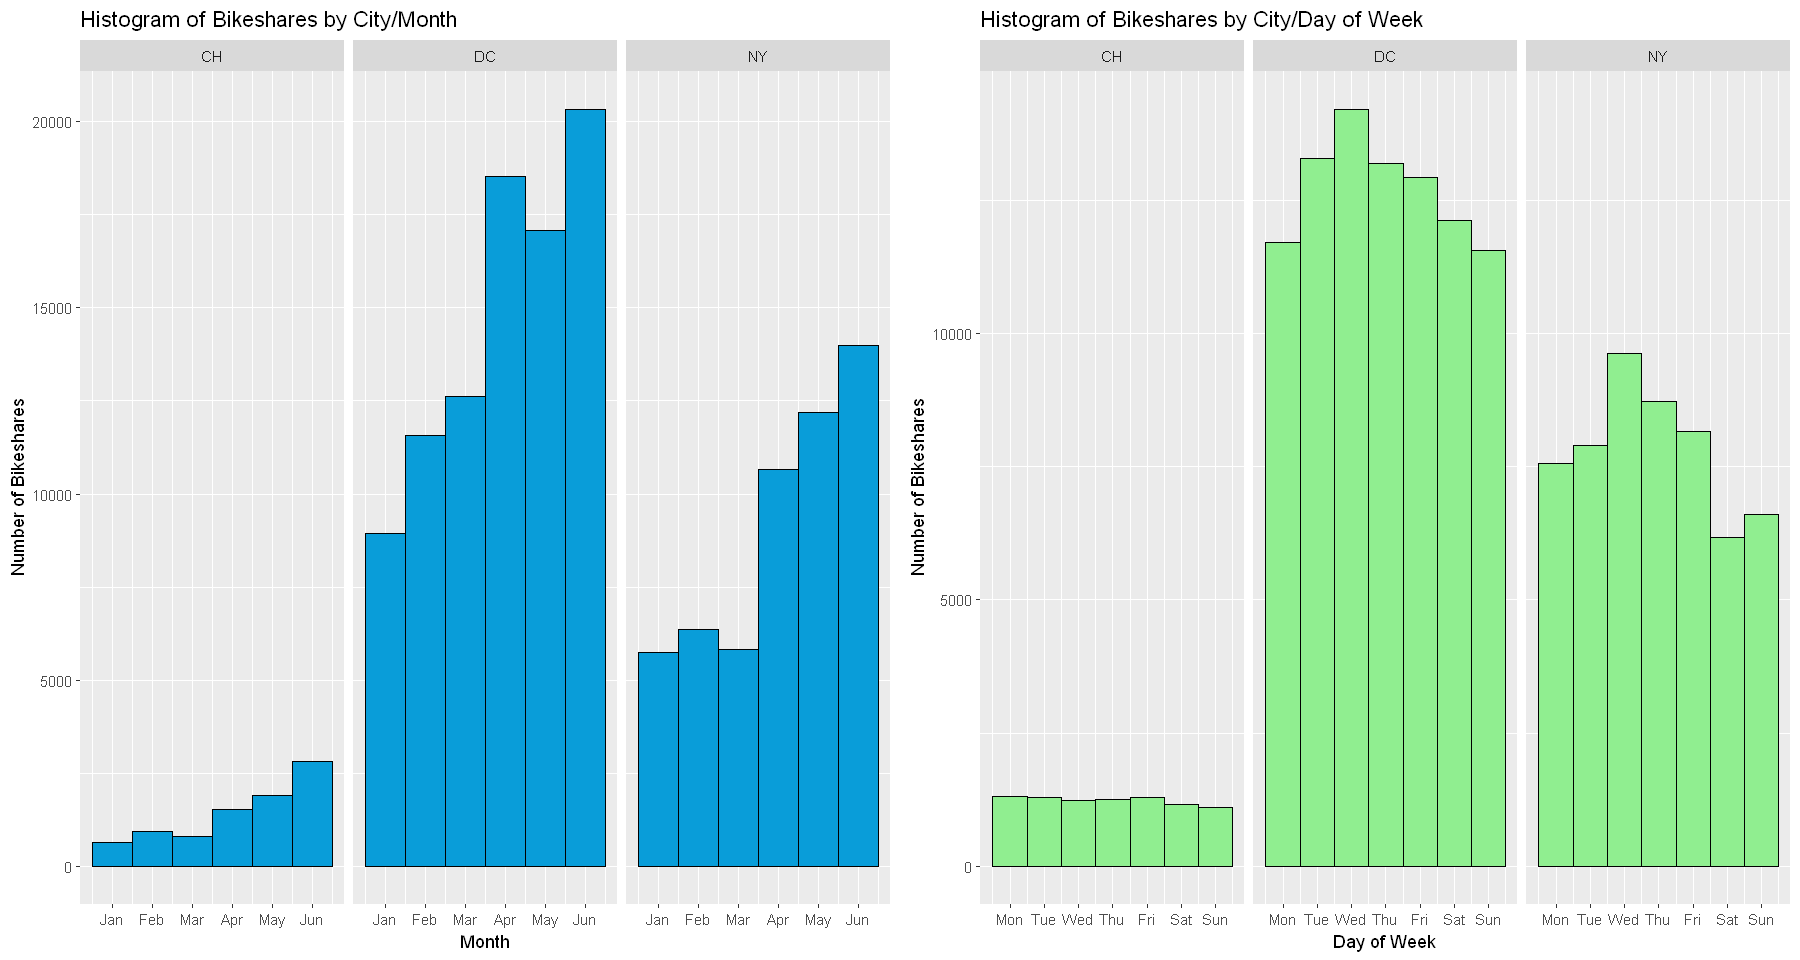

In [228]:
# Your solution code goes here

plot1 <- ggplot(aes(x=Month), data=dfMaster)+
            geom_histogram(binwidth=1, color = 'black', fill = '#099DD9')+
            scale_x_continuous(breaks=1:6, labels=c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))+
            facet_wrap(~City, ncol = 3)+
            xlab('Month')+
            ylab('Number of Bikeshares')+
            ggtitle('Histogram of Bikeshares by City/Month')

plot2 <- ggplot(aes(x=Day.Of.Week), data=dfMaster)+
            geom_histogram(binwidth=1, color = 'black', fill = 'lightgreen')+
            scale_x_continuous(breaks=seq(1,7,1), labels=c('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))+
            facet_wrap(~City, ncol = 3)+
            xlab('Day of Week')+
            ylab('Number of Bikeshares')+
            ggtitle('Histogram of Bikeshares by City/Day of Week')
grid.arrange(plot1, plot2, ncol=2)

**Washington, DC has the most bikeshare rentals by a large margin, followed by NYC and the Chicago. In all three cities, the winter months show less rentals, but as we move into spring and summner, bikeshare rentals increase. When it comes to the days of the week with the most rentals, Chicago stays fairly flat. For DC, the weekday rentals spike mid-week, and the same observation can be made for NYC. One interesting point to note is that bikeshare rentals in NYC drop on the weekends significantly, while they don't in Chicago or DC.**

### Question 2

**Since we have the Year of Birth for bikeshare riders for Chicago and NYC, lets examine if the duration of trips has any correlation with the age of the rider. Since both locations are large cities, I would expect to see younger riders taking longer trips. The asumption is they are using the bikeshare program to commute to work.**

In [270]:
# Check Trip.Duration for any extreme outliers - Will exclude trips over 120 mins
summary(dfMaster$Mins)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.000     6.533    11.117    18.308    19.312 18143.900 

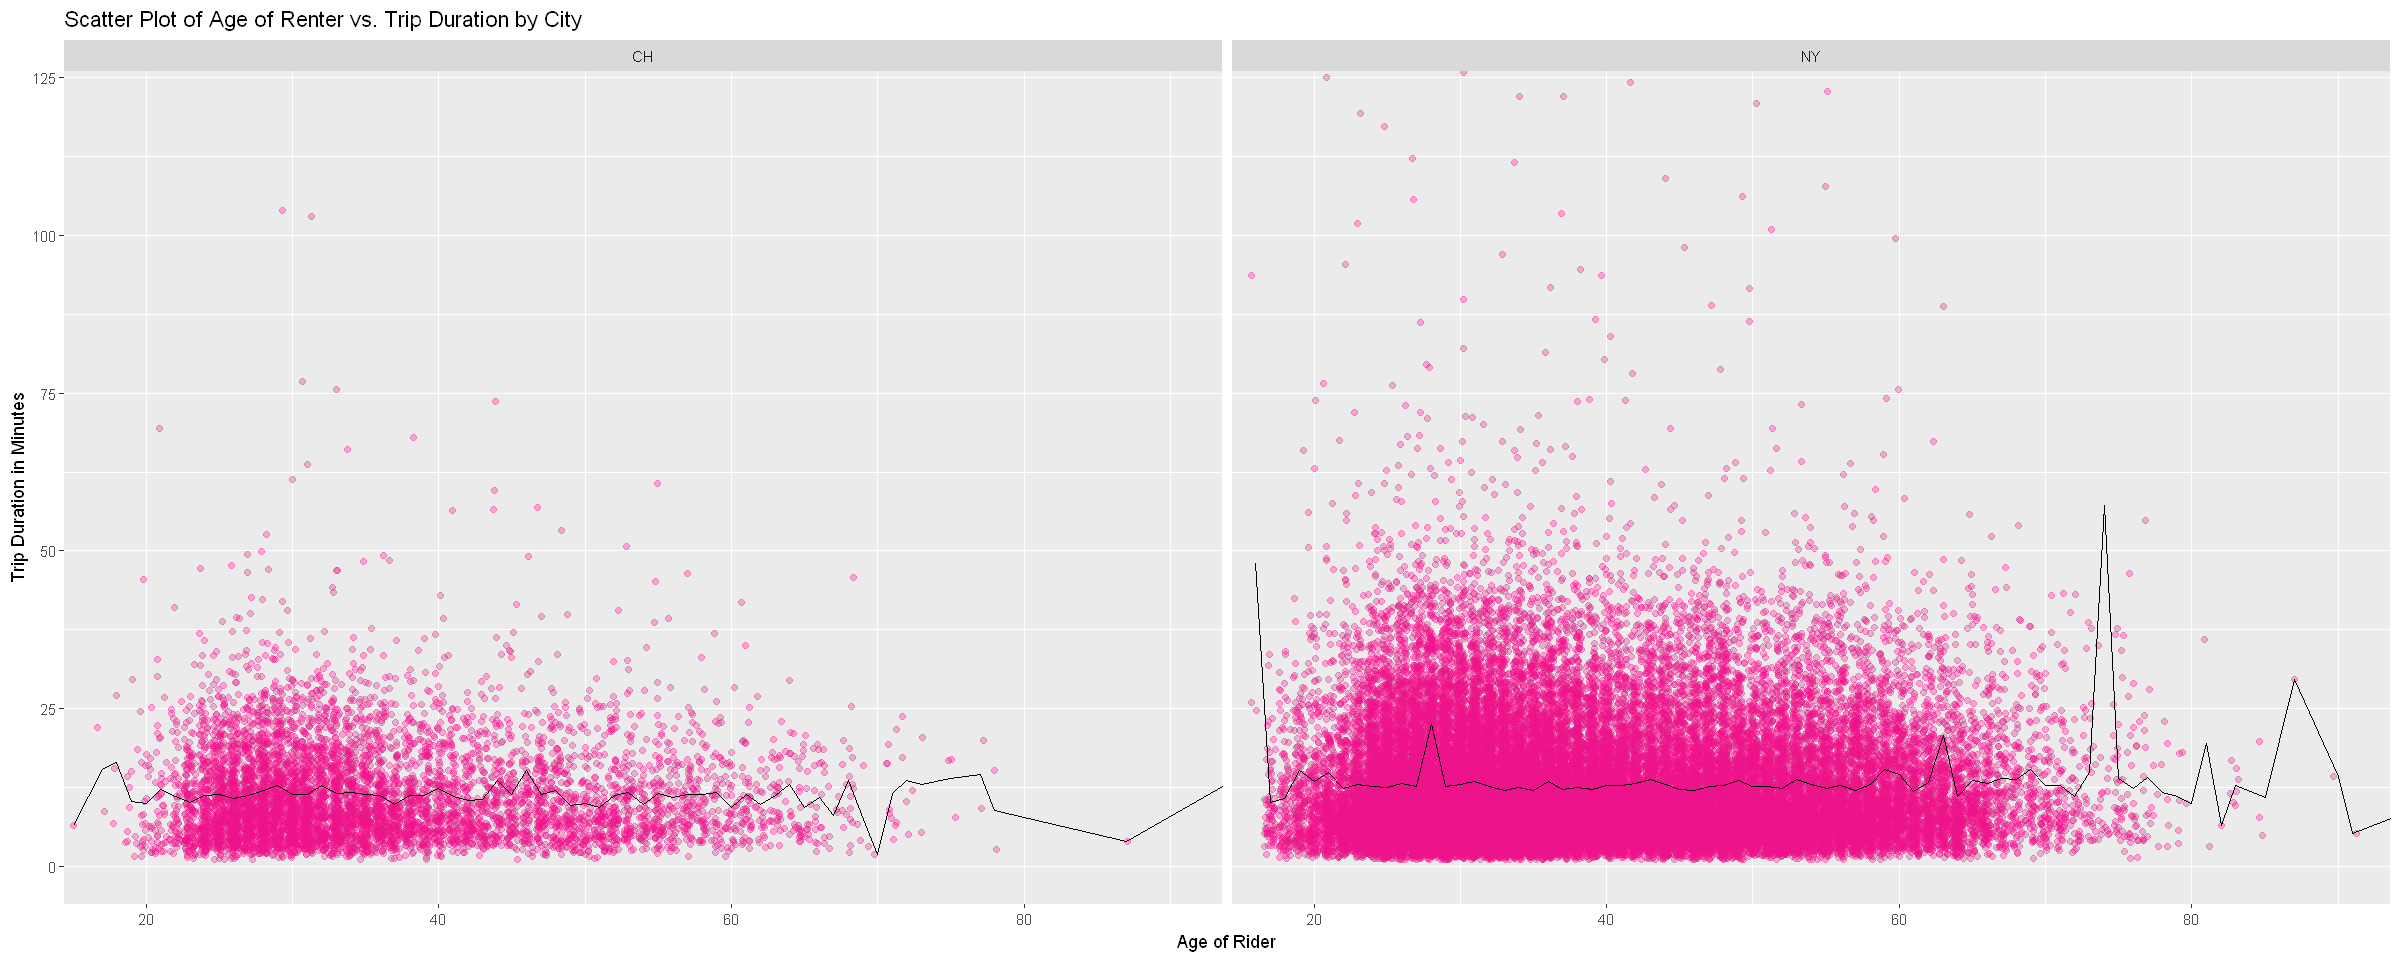

In [343]:
# Your solution code goes here
ggplot(aes(x = Age, y = Mins), data = subset(dfMaster, !is.na(Age)))+
  coord_cartesian(xlim = c(18,90), ylim = c(0, 120))+
  geom_point(alpha = 0.30, position = position_jitter(h = 0), color='deeppink2')+
  geom_line(stat = 'summary', fun = 'mean', color='black')+
  facet_wrap(~City)+
  xlab('Age of Rider')+
  ylab('Trip Duration in Minutes')+
  ggtitle('Scatter Plot of Age of Renter vs. Trip Duration by City')

**While we do see an increase in Trip Duration for riders aged 25-40 for riders in Chicago, the Trip Duration remains high in NYC for riders 25-60. Ridership tapers off quickly in Chicago after age 65 but remains higher in NYC until age 70. My hypothisis of younger riders taking longer trips is not reflected in the data.**

### Question 3

**Now that we know there are bikeshare riders of all ages, we must ask if gender plays a roll in ridership. Since we have gender data for NYC and Chicago, lets compare Age versus Gender and look for any clues. Will Age or Gender be impacted by what city the rider is from?**

subs$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   28.00   34.00   37.39   46.00   90.00 
------------------------------------------------------------ 
subs$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   29.00   36.00   38.76   47.00   87.00 

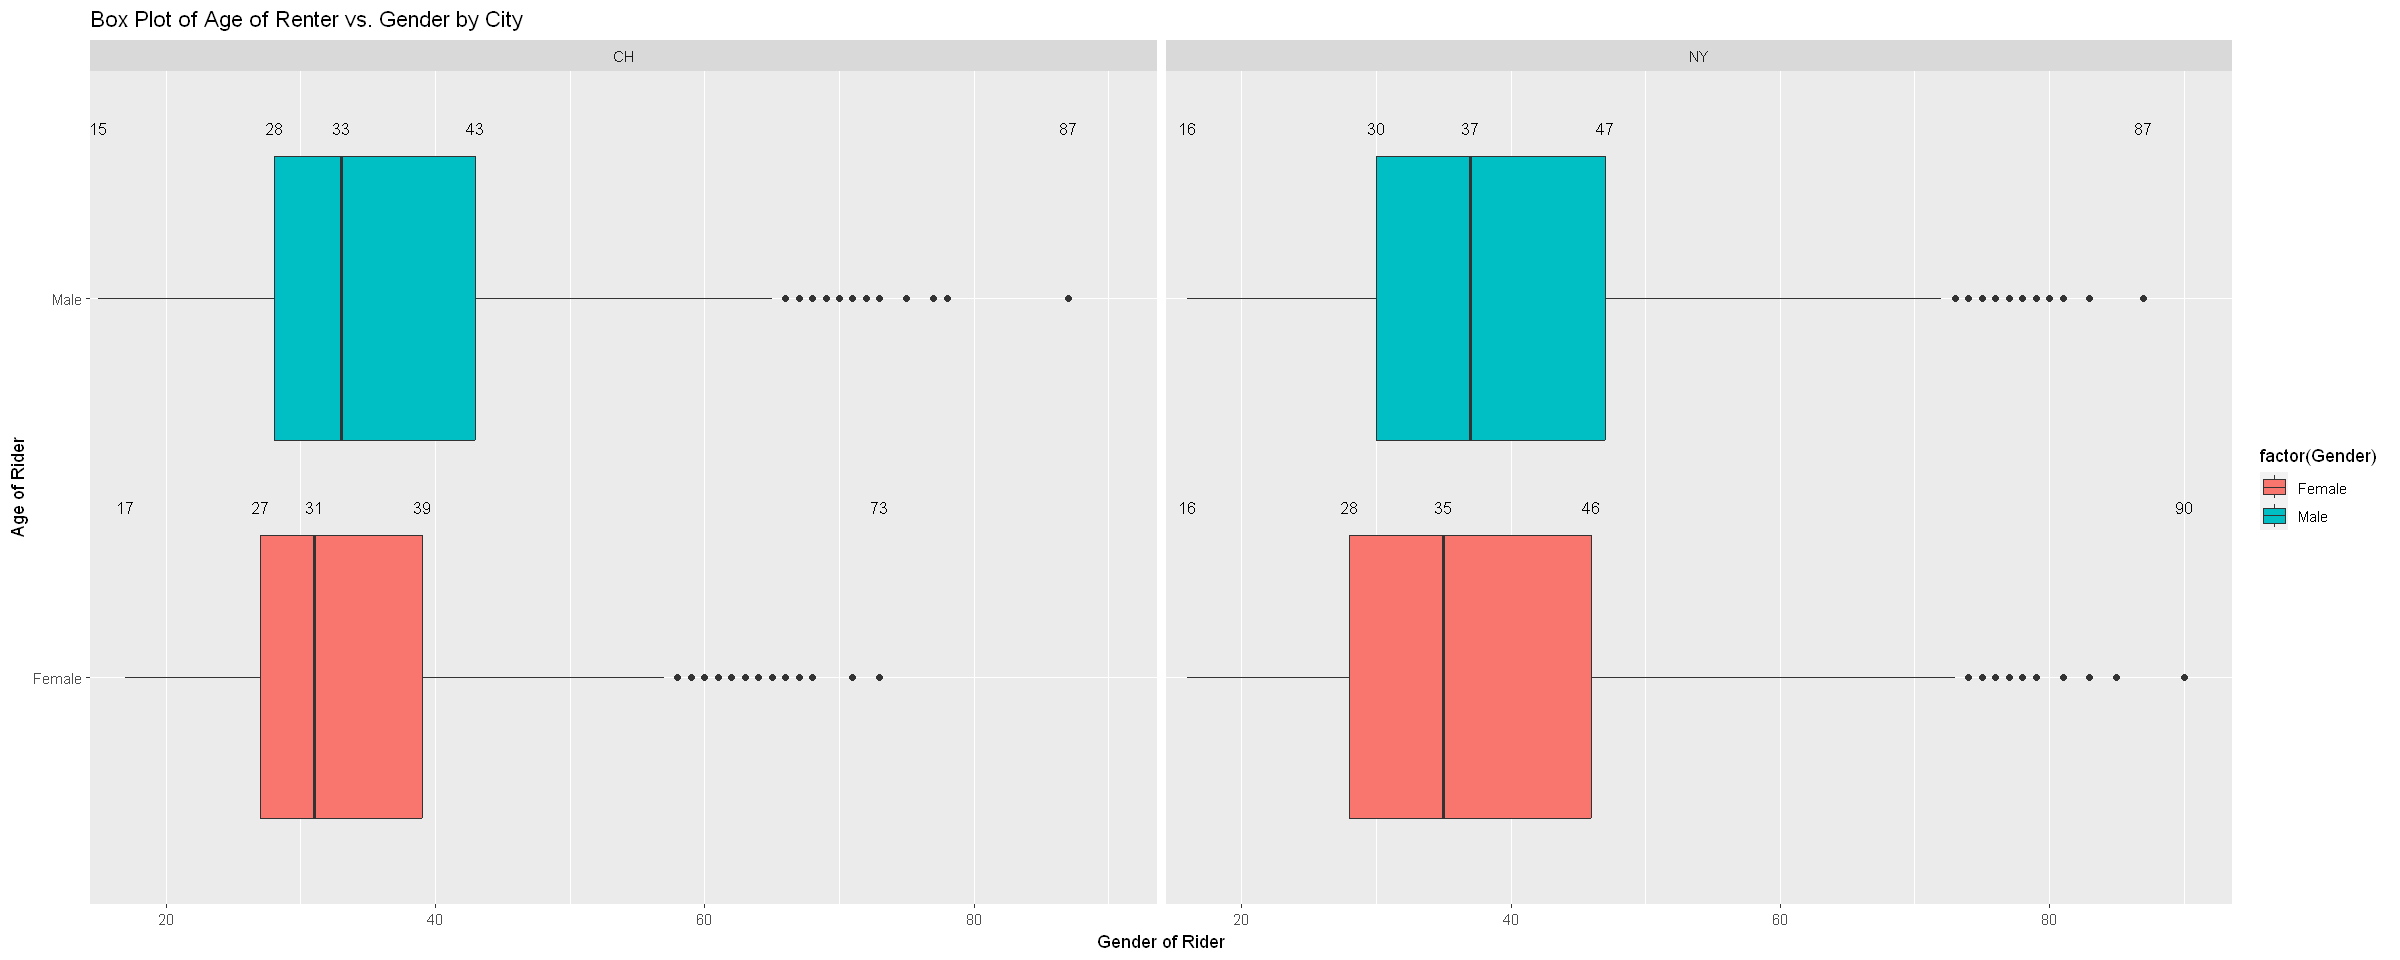

In [331]:
# Create a subset of dfMaster to exclude NA, '' and Age <= 90
subs=subset(dfMaster, (!is.na(dfMaster[,8])) & (dfMaster[,8] != '') & (!is.na(dfMaster[,15])) & (dfMaster[,15] <= 90))

ggplot(aes(x=Gender, y=Age),  data=subs)+
    geom_boxplot(aes(fill=factor(Gender)))+
    stat_summary(geom='text', fun='quantile',
        aes(label=after_stat(y)), position=position_nudge(x=0.45), size=3.5)+
    facet_wrap(~City)+
    coord_flip(ylim = c(18,90))+
    xlab('Age of Rider')+
    ylab('Gender of Rider')+
    ggtitle('Box Plot of Age of Renter vs. Gender by City')
by(subs$Age, subs$Gender, summary)

# https://stackoverflow.com/questions/38020772/annotate-boxplot-in-ggplot2

**It appears that in NYC, bikeshare riders are almost evenly split by Gender, and the quartile ranges for Age have only slight differences. In Chicago, male riders tend to be a few years older than their female counterparts, especially when observing Q2 & Q3. It is interesting to note, that in both cities, there are significantly more older riders in Q3 than in the other quartiles.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!